<a href="https://colab.research.google.com/github/mauricionoris/25B3_ml/blob/master/colabs/MNIST_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Feedfoward  Neural  Network
Fully Connected Network
##Deep Learning (MNIST Classification) -  part #2

In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train:',X_train.shape)
print('y_train:',y_train.shape)
print('X_test:',X_test.shape)
print('y_test:',y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train: (60000, 28, 28)
y_train: (60000,)
X_test: (10000, 28, 28)
y_test: (10000,)


In [ ]:
# importando as bibliotecas tradicionais mais utilizadas
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# verificando as 10 classes com seus rótulos do banco de dados
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
# Visualização de parte do dataset
def show_data(examples, targets):
  samples = 64
  rand_num = np.random.randint(0, examples.shape[0] - samples)
  plt.figure(figsize = (8,8))
  for i in range(samples):
    plt.subplot(8, 8, i+1)
    plt.imshow(examples[rand_num + i], cmap = 'Greys')
    plt.xlabel(f"Label: {targets[rand_num + i]}")
    plt.xticks([])
    plt.yticks([])
  plt.tight_layout()
  plt.show()

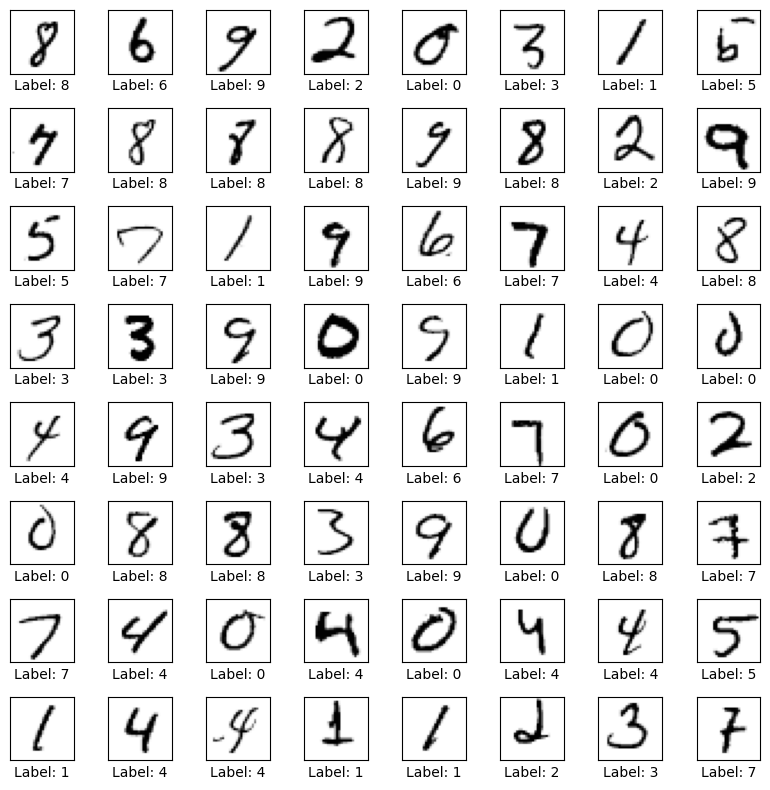

In [ ]:
show_data(X_train, y_train)

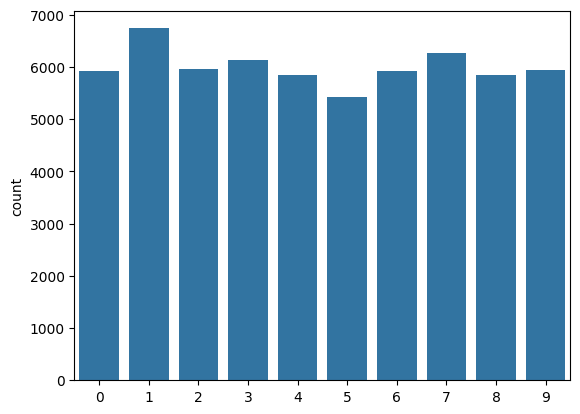

In [ ]:
import seaborn as sns
g = sns.countplot(x=y_train)

## Formatação dos dados de entrada

A alimentação de uma rede neural simples é dada por um vetor de entrada.
Entretendo,  os  dados  MNIST  são  matrizes  que  representam  as  imagens  dos  dígitos
escritos à mão. É necessário, então, que haja uma manipulação nos dados de entrada,
mudando  o  formato  “28x28”  para  “784x1”.  Abaixo é utilização do método “*reshape*”, que muda o formato de um *array*.

In [ ]:
# uma maneira de se fazer o reshape de 28x28 para 784
X_train_flat = X_train.reshape(60000, 784)
print(X_train_flat.shape)

(60000, 784)


In [ ]:
# outra maneira de se fazer o reshape de 28x28 para 784
X_test_flat = X_test.reshape(-1, 28*28)
print(X_test_flat.shape)

(10000, 784)


In [ ]:
# reescalonamento
X_train_sc = X_train_flat / 255
X_test_sc = X_test_flat / 255
# X_train_sc = X_train_flat.astype('float32') / 255.0
# X_test_sc = X_test_flat.astype('float32') / 255.0
print(f'Valor mínimo do pixel após a normalização: {X_train_sc.min()}')
print(f'Valor máximo do pixel após a normalização: {X_train_sc.max()}')

Valor mínimo do pixel após a normalização: 0.0
Valor máximo do pixel após a normalização: 1.0


In [ ]:
# Categorical encoding
from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [ ]:
# One-Hot Encoding
print('y_train[0]:',y_train[0])
print('y_train_cat[0]:',y_train_cat[0])

y_train[0]: 5
y_train_cat[0]: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow.keras.backend as K

##Arquitetura da rede
- Camada de entrada: 784 neurônios
- 1a. camada oculta: 512 neurônios --> função de ativação: *relu*
- 2a. camada oculta: 256 neurônios --> função de ativação: *relu*
- 3a. camada oculta: 128 neurônios --> função de ativação: *relu*
- 4a. camada oculta: 32 neurônios --> função de ativação: *relu*
- Camada de saída: 10 neurônios --> função de ativação: *softmax*

In [ ]:
# inicializa a sessão
K.clear_session()
# inicialização do modelo
model = Sequential()
# camada de entrada Input = 28*28 =  784
model.add(Input((28*28,)))
# primeira hidden layer
model.add(Dense(512, activation='relu'))
# segunda hidden layer
model.add(Dense(256, activation='relu'))
# terceira hidden layer
model.add(Dense(128, activation='relu'))
# quarta hidden layer
model.add(Dense(32, activation='relu'))
# camada de saída
model.add(Dense(10, activation='softmax'))

## Funções de ativação

Escolheram-se as funções de ativações *ReLu* e *Softmax* para as  *hidden layers* e para a camada de saída, respectivamente. A função Unidade Linear Retificada (*ReLU*), definida pela  equação  abaixo,  é  uma  escolha  comum  de  não  linearidade  e  retorna  0  para  valores
negativos e possui uma relação linear para valores positivos.

$$ 𝑅𝑒𝐿𝑢(𝑧) = 𝑚𝑎𝑥(0, 𝑧)$$

Para a camada de saída, por outro lado, não se espera um valor numérico qualquer. É desejado  que,  ao  final  do  modelo,  seja  apontado  um  rótulo  específico  dentre  os  10 existentes. Para tanto, utiliza-se a função *Softmax*, definida pela equação abaixo, que retorna a probabilidade de cada neurônio contido na camada de saída ser o rótulo verdadeiro.

$$Softmax(z)=\frac{e^{(z_i)}}{\sum_j e^{(z_j)}}$$

Dessa  forma,  para  uma  rede  treinada,  uma  imagem  contendo  o  dígito  manuscrito  2 retornaria um valor alto no neurônio que representa o rótulo 2 e valores baixos nos demais  neurônios,  indicando  que  há  uma  grande  possibilidade  daquela  imagem representar o numeral em questão.

## Função custo
A função custo, diferentemente da MSE  para problemas de regressão, deve  levar em
consideração  as  probabilidades  atingidas  ao  final  do  modelo.  Para  tanto,  utiliza-se  a
*Categorical Crossentropy*, definida pela equação abaixo, uma escolha comum para
tratar problemas de multivariáveis.

$$𝐶𝐶𝐸(𝑧) = -\frac{1}{n} \sum_{i=1}^n [y_i \log (ŷ_i) + (1-y_i) \log (1-ŷ_i)] $$

## Optimizers


The **optimizer** is the algorithm used internally by Keras to update the weights and move the model towards lower values of the cost function. [Keras implements several optimizers](https://keras.io/optimizers/) that go by fancy names like SGD, Adam, RMSProp and many more. Despite these clever sounding names, the optimizers are all variations of the same concept, which is the [Stochastic Gradient Descent](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) or SGD.


SGD is so fundamental that we have invented an acronym to help you remember it. If you find it hard to remember Stochastic Gradient Descent, think **S**imply **G**o **D**own, which is what SGD does!


>TIP: In the next pages you will find some mathematical symbols when we explain the algorithms. We highlighted the algorithms pseudo-code parts with a blue box like this: <div class="alert alert-block alert-info"> Here's the algorithm </div><br/>
> Feel free to skim through these if maths is not your favorite thing, you'll find a practical comparison of optimizers just after this section.

### Stochastic Gradient Descent (or Simply Go Down) and its variations

Let's begin our discovery of optimizers with a review of the SGD algorithm. SGD only needs one hyper-parameter: the learning rate. Once we know the learning rate, we proceed in a loop by:

1. Sampling a minibatch from the training set.
2. Computing the gradients.
3. Updating the weights by subtracting the gradient times the learning rate.


Using a bit more formal language, we can write SGD as:

#### SGD

<div class="alert alert-block alert-info">

- Choose an initial vector of parameters $w$ and learning rate $\eta$
- Repeat until stop rule:
    - Extract a random batch from the training set, with corresponding training labels
    - Evaluate the average cost function $J(y, \hat{y})$ using the points in the batch
    - Evaluate the gradient $g = \nabla_w J(w)$ using the points in the batch and the current value of the parameters $w$
    - Apply the update rule: $w -> w - \eta g$

</div>
<br/>

The stopping rule could be a fixed number of updates or epochs as well a condition on the amount of change in the cost function. For example, we could decide to stop the training loop if the value of the cost is not changing too much.

#### Momentum

In recent years, several improvements have been proposed to this formula.

A first improvement of the SGD is to add momentum. **Momentum** means that we accumulate the gradient corrections in a variable $v$ called _velocity_, that serves as a smoothed version of the gradient.

<div class="alert alert-block alert-info">

- Like SGD, choose an initial vector of parameters $w$, a learning rate $\eta$ and a momentum parameter $\mu$
- Repeat until stop rule:
    - Same 3 steps as SGD (get batch, evaluate cost, evaluate gradient)
    - Accumulate gradients into velocity: $v = \mu v - \eta g$
    - Apply the update rule: $w -> w - v$

</div>
<br/>

Applying momentum is like saying: if you are going down in a direction, then you should keep going more or less in that direction minus a small correction given by the new gradients. It's as if instead of walking downhill, we would roll down like a ball. The name comes from physics, in case you're curious.

#### AdaGrad

SGD and SGD + momentum keep the learning rate constant for each parameter. This method can be problematic if the parameters are sparse (i.e., most of them are zero except a few ones).

An adaptive algorithm, like **AdaGrad**, overcome this problem by accumulating the square of the gradient into a normalization variable for each of the parameters. The result of this is that each parameter will have a personalized learning rate. Parameters whose gradient is large will have a learning rate that decreases fast, while parameters that have small gradients will have a large learning rate.

This modification makes the loss converge faster than pure SGD.

<div class="alert alert-block alert-info">

- Like SGD, choose an initial vector of parameters $w$, a learning rate $\eta$, a small constant $\delta = 10^{-7}$ to avoid division by 0
- Repeat until stop rule:
    - Same 3 steps as SGD (get batch, evaluate cost, evaluate gradient)
    - Accumulate the square of the gradient: $r -> r + g \odot g$
    - Compute update: $\Delta w = \eta \frac{1}{\delta + \sqrt{r}} \odot g$
    - Apply the update rule $w -> w - \Delta w$

</div>
<br/>

Let's break down the above equation for the update so that we understand it fully. Both the accumulation step and the update step are computed element by element so that we can focus on a single parameter.

- For a single parameter $w_i$, $g \odot g$ is equivalent to $g_i^2$, so we are accumulating the square of the gradient in a variable $r_i$ for each parameter.

- $\frac{\eta}{\delta + \sqrt{r}} \odot g$ may look a bit daunting at first, so let's break it down. $\eta$ is the learning rate, no surprises here. For a single parameter $w_i$ we are dividing the value of the gradient $g_i$ by the square root of the accumulated square gradients $r_i$. If the gradients are large, we will be dividing by a large quantity. On the other hand, if the gradients are small, we will be dividing by a small quantity. This yields a practically constant update step size, multiplied by the learning rate. The $\delta$ in the denominator is a numerical regularization constant so that we do not risk dividing by zero if $r$ becomes too small.

#### RMSProp: Root Mean Square Propagation (or Adagrad with EWMA)

RMSProp is also adaptive, but it allows to choose the fraction of squared gradients to accumulate, using an Exponentially Weighted Moving Average (or EWMA) decay in the accumulation formula.

<div class="alert alert-block alert-info">

- Like SGD, choose an initial vector of parameters $w$, a learning rate $\eta$, a small constant $\delta = 10^{-7}$ to avoid division by zero and an EWMA mixing factor $\rho$ between 0 and 1, this is also called decay rate
- Repeat until stop rule:
    - Same 3 steps as SGD (get batch, evaluate cost, evaluate gradient)
    - Accumulate EWMA of the square of the gradient: $r -> \rho r + (1-\rho) g \odot g$
    - Same update rules as Adagrad

</div>
<br/>

#### Adam: Adaptive Moment Estimation (or EWMA everywhere)

Finally, let's introduce Adam. This algorithm improves upon RMSProp by applying EWMA to the gradient update as well as the square of the gradient.

<div class="alert alert-block alert-info">

- Like SGD, choose an initial vector of parameters $w$, a learning rate $\eta$, a small constant $\delta = 10^{-7}$ to avoid division by zero and an EWMA mixing factors $\rho_1$ and $\rho_2$ between 0 and 1 (usually chosen as 0.9 and 0.999 respectively)
- Repeat until stop rule:
    - Same 3 steps as SGD (get batch, evaluate cost, evaluate gradient)
    - Accumulate EWMA of the gradient: $v -> \rho_1 v + (1-\rho_2) g$
    - Accumulate EWMA the square of the gradient: $r -> \rho_2 r + (1-\rho_2) g \odot g$
    - Correct bias 1: $\hat{v} = \frac{v}{1 - \rho_1^t}$
    - Correct bias 2: $\hat{r} = \frac{r}{1 - \rho_2^t}$
    - Compute update: $\Delta w = \eta \frac{1}{\delta + \sqrt{\hat{r}}} \odot \hat{v}$
    - Apply the update rule $w -> w - \Delta w$

</div>
<br/>

This formula may also appear to be a bit complicated, so let's walk through it step by step.

- We apply EWMA to both the gradient and its square. We take inspiration from both the momentum and the RMSProp formulas.
- The only other novelty is the bias correction. We take the current value of the accumulated quantity and divide it by $(1 - \rho^t)$. Since both decay rates are almost 1, the normalization is very small initially, and it increases as time goes by. This seems to work in practice well.

In summary, we have seen a few of the most popular optimization algorithms. You are probably wondering how to choose the best one. Unfortunately, there is no best one, and each of them performs better in some conditions. What is true though, is that a good choice of the hyperparameters is key for an algorithm to perform well, and we encourage you to familiarize yourself with one algorithm and understand the effects of changing hyperparameter.

In [ ]:
# Compilação do modelo
from tensorflow.keras.optimizers import SGD, RMSprop
# optimizer = Stocatisc Gradient Decent
optimizer_=SGD(learning_rate=0.01)
# compilando o modelo da rede
model.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
# salva os pesos e bias com os valores inicias
model.save_weights('model.weights.h5')
# plota o sumário do modelo da rede
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

## Parâmetros do treinamento

Os parêmtros que serão treinados são os pesos (*weigths*) e os vieses (*bias*) das entradas de cada neurônio das camadas ocultas (*hidden layers*) e da camada de saída (*output layer*). A camada inicial, composta por 784 neurônios, tem apenas uma entrada com o valor do pixel ($0<x_i<1$).

A primeira camada oculta possui 512 neurônios. Cada um tem 784 entradas, provenientes da camanda anterior, com um peso cada, mais um vies:

$$n_{par}(1) = 512 * (784 + 1) = 401920$$

A segunda camada oculta possui 256 neurônios. Cada um tem 512 entradas, provenientes da camanda anterior, com um peso cada, mais um vies:

$$n_{par}(2) = 256 * (512 + 1) = 131328$$

A terceira camada oculta possui 128 neurônios. Cada um tem 256 entradas, provenientes da camanda anterior, com um peso cada, mais um vies:

$$n_{par}(3) = 128 * (256 + 1) = 32896$$

A quarta camada oculta possui 32 neurônios. Cada um tem 128 entradas, provenientes da camanda anterior, com um peso cada, mais um vies:

$$n_{par}(4) = 32 * (128 + 1) = 4128$$

A camada de saída possui 10 neurônios. Cada um tem 32 entradas, provenientes da camanda anterior, com um peso cada, mais um vies:

$$n_{par}(5) = 10 * (32 + 1) = 330$$

Total dos parâmetros treináveis:

$$n_{par}(T) = \sum_i^T n_{par}(i) = 570602$$

Uma pequena rede, como a deste exemplo, possui 570602 parâmetros (pesos e vieses) para serem treinados, ou seja, cada um desses parâmetros serão atualizados pelo algoritmo *backpropagation* a cada iteração (*epoch*), até atingir o número total de iterações. Por esta razão é que as redes neurais artificiais se tornam mais lentas nos treinamentos a medida que se aumente a quantidade de neurônios e as camadas ocultas, podendo demandar horas ou dias de treinamento.

In [ ]:
# para medição do tempo de treinamento
import time


###Validation dataset
Criação do banco de validação (*validation_split*), com 10% do banco de treinamento.

O banco de dados de validação não é treinado com a rede, serve somente de teste de desempenho da rede com novos dados, que é feito concomitantemente com o treinamento da rede. É muito importante para se determinar o comportamento da rede ao longo do treinamento.

Durante a otimização do modelo, é comum o ajuste de hiperparâmetros e a realização de
tratamentos estatísticos com o intuito de aproximar a predição do modelo com os dados
reais. Dessa forma, cria-se a possibilidade de um overfitting em relação ao conjunto de
teste e, portanto, mostra-se necessária a criação de um terceiro subconjunto que permita
uma validação intermediária: os dados de validação.

In [ ]:
# início do treinamento da rede
start_time = time.process_time()
# carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
model.load_weights('model.weights.h5')
# treinamento da rede
# Os parâmetros adotados para o trainamento são: mini batch size (*batch_size*) = 128, número de iterações (*epochs*) = 20
h = model.fit(X_train_sc, y_train_cat, batch_size=128, epochs=20, verbose=1, validation_split=0.1)
# tempo total de treinamento da rede
training_time_s = time.process_time() - start_time
training_time_m = training_time_s / 60
print("\nTempo de treinamento da rede: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.4000 - loss: 1.9014 - val_accuracy: 0.8843 - val_loss: 0.5058
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.8715 - loss: 0.4895 - val_accuracy: 0.9150 - val_loss: 0.3004
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9023 - loss: 0.3400 - val_accuracy: 0.9298 - val_loss: 0.2489
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9148 - loss: 0.2942 - val_accuracy: 0.9388 - val_loss: 0.2161
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9268 - loss: 0.2559 - val_accuracy: 0.9420 - val_loss: 0.1999
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9328 - loss: 0.2313 - val_accuracy: 0.9470 - val_loss: 0.1863
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9365 - loss: 0.2140 - val_accuracy: 0.9547 - val_loss: 0.1708
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9440 - loss: 0.1941 - val_accu

##Análise dos resultados
- Tamanho do banco de dados para treinamento: 60000 amostras.
- Quantidade de dados separados para a validação: 6000 amostras (10%).
- Tamanho do lote para atualização dos pesos da rede (backpropagation): batch_size = 128 amostras. Ou seja, a cada 128 amostras faz-se os cálculos da regra da cadeia para atualização dos pesos da rede.
- Quantidade de lotes em que se faz a atualização dos pesos em cada época: (60000 - 6000) / 128 = 422 (arredondado para mais).
- ETA (Estimated Time of Arival): tempo estimado para finalização do treinamento da época corrente.
- loss: valor da função perda (custo) no final do treinamento da época corrente.
- accuracy: valor da acurácia (percential de acertos) no final do treinamento da época corrente.
- val_loss: valor da função perda (custo) no banco de dados de validação no final do treinamento da época corrente.
- val_accuracy: valor da acurácia (percential de acertos) no banco de dados de validação no final do treinamento da época corrente.

In [ ]:
# plot graphs function
def plot_graphs():
  plt.figure(figsize = (11,5))
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Função Custo')
  plt.title('loss')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(h.history['accuracy'], label = 'Treino')
  plt.plot(h.history['val_accuracy'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.title('accuracy')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.show()

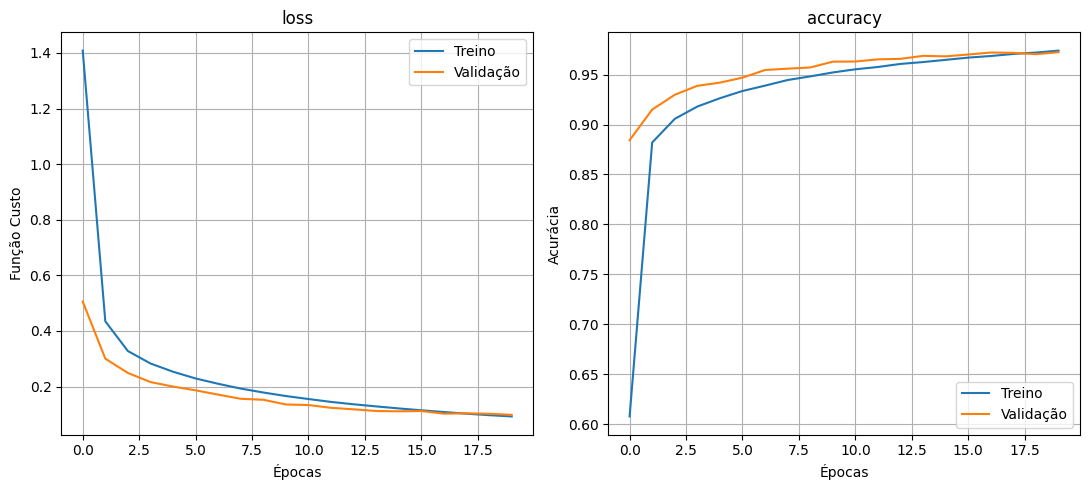

In [ ]:
plot_graphs()

## Análise dos resultados

Após o treinamento da rede, utilizando-se otimizador SGD com uma taxa de aprendizagem de 0.01, 128 lotes e 20 épocas, obtém-se ~97% de acuracidade para os dados de treino e ~97% para os dados de validação, o que nos dá um resultado inicial satisfatório, indicando uma tendência de generalização da rede.

Pode-se realizar  mudanças  nos  hiperparâmetros  com  o  intuito  de  melhorar  os resultados  obtidos.  Ao  observar  os  gráficos  gerados  ao  final  do  treinamento,  pode-se observar  que  durante  as  20  épocas,  o  modelo  não  alcançou  a  convergência,  que  seria
representada  por  uma  linha  quase  horizontal  no  final  do  gráfico.  Pode-se aumentrar o número de épocas para 30, 50, 100 ou maior para se tentar melhor acurária. Deve-se tomar cuidado com o *overfitting*, característico de um treinamento excessivo.

## Teste da rede

Pode-se, testar o  modelo com os dados de teste. Para isso, utiliza-se o método “*.evaluate*”. Para o problema posto, obteve-se uma acurácia de ~96% nestes dados de teste.

In [ ]:
# Testando o modelo com os dados de teste
[loss,acc]=model.evaluate(X_test_sc, y_test_cat)
print("Test dataset: \nAccuracy: %.2f%%\nLoss: %.3f" % (acc*100, loss))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9589 - loss: 0.1314
Test dataset: 
Accuracy: 96.56%
Loss: 0.111


44444## Predições

Pode-se, ainda, utilizar
o modelo para predizer um valor a partir de uma imagem sem rótulo por meio do método
“.*predict*”.

In [ ]:
# utilizando o modelo para fazer as predições
prediction = model.predict(X_test_flat)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


O resultado das predições nesta rede neural em que se utiliza a função loss='*categorical_crossentropy*' são valores estatísticos, onde o maior valor é a maior probabilidade de reultado positivo. Assim, como os labels do banco de dados vão de 0 à 9, a posição de maior valor numérico nas linhas da matriz de predição vão indicar o label correspondente, como maior probalidade de acerto.

In [ ]:
amostra = 1;
print('y_prediction[amostra] =', prediction[amostra])
print('Soma dos valores de predição da amostra:', prediction[amostra].sum())
print('Posição do maior valor numérico:', prediction[amostra].argmax())
print('Probalidade de acerto: %.3f%%' %(prediction[amostra].max()*100))
print('Label y_test[amostra] =', y_test[amostra])

y_prediction[amostra] = [0.         0.         0.99999994 0.         0.         0.
 0.         0.         0.         0.        ]
Soma dos valores de predição da amostra: 0.99999994
Posição do maior valor numérico: 2
Probalidade de acerto: 100.000%
Label y_test[amostra] = 2


In [ ]:
y_predict = np.argmax(prediction,axis=1)
y_predict

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
# matriz de confusão simples
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, y_predict)
print(confusion)

[[ 969    0    3    3    0    0    3    1    1    0]
 [   0 1116    4    1    0    1    5    2    6    0]
 [   4    0 1015    2    1    0    3    3    4    0]
 [   1    0   14  981    0    2    0    3    8    1]
 [   2    0    7    1  943    0   10    3    2   14]
 [  10    1    1   30    2  825   11    0    8    4]
 [   9    3    1    1    2    2  939    0    1    0]
 [   2    7   20    7    2    1    0  975    2   12]
 [   7    0    9   16    4    2    8    3  924    1]
 [   9    5    3   11   17    1    2    7    7  947]]


In [ ]:
# função para visualização de uma forma elegante da matriz de confusão
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (13,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

###Multi-class Confusion Matrix

In this case, the element $i$,$j$ of the matrix will tell us how many data points in class $i$ have been predicted to be in class $j$. This is very powerful to see if any of the classes are being confused. If so we can isolate the data being misclassified and try to understand why.

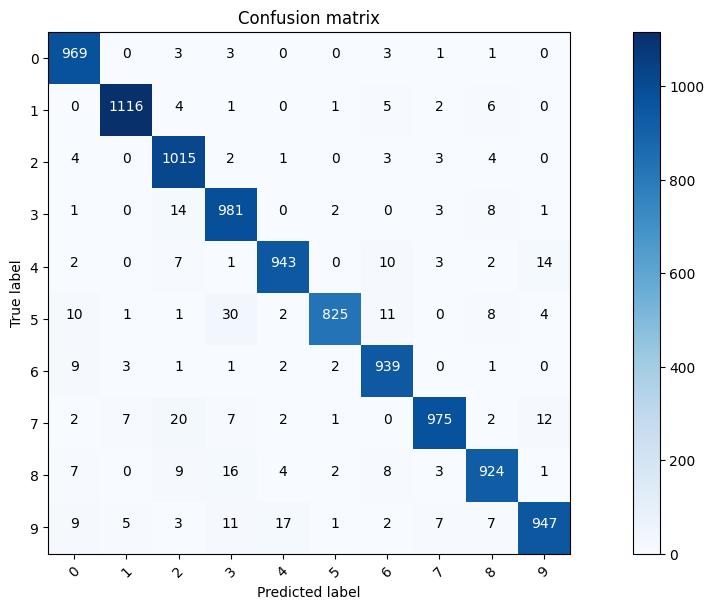

In [ ]:
plot_confusion_matrix(confusion, classes = range(10))

##Metrics: Classification Report
False Positives and False Negatives are usually expressed in terms of two sister quantities: Precision and Recall. Here they are:

###Precision
We define precision as the ratio of True Positives to the total number of positive tests:

\begin{equation}
\textrm{Precision} = \frac{(\textrm{TP})}{\textrm{TP} + \textrm{FP}}
\end{equation}

Precision $P$ will tend towards 1 when the number of False Positives goes to zero, i.e. when we do not create any false alerts and are thus, "precise". Here on every positive case we are correct.

###Recall
On the other hand, recall is defined as the ratio of True Positives to the total number of actually positive cases:

\begin{equation}
\textrm{Recall} = \frac{(\textrm{TP})}{\textrm{TP} + \textrm{FN}}
\end{equation}

Recall $R$ will tend towards 1 when the number of False Negatives goes to zero, i.e. when we do not miss many of the positive cases or we "recall" all of them.

###F1 Score
Finally, we can combine the two in what's called F1-score:

\begin{equation}
F1 = 2 \frac{PR}{P + R}
\end{equation}

$F1$ will be close to 1 if both precision and recall are close to 1, while it will go to zero if either of them is low. In this sense, the F1 score is an excellent way to make sure that both precision and recall are high.

The $F1$ score is a [harmonic mean](https://en.wikipedia.org/wiki/Harmonic_mean) of precision and recall. The harmonic mean is an average for ratios. There are also other F-scores that give more weight to precision or to recall more, called F-beta scores. You can read about them on [Wikipedia](https://en.wikipedia.org/wiki/F1_score) and [Scikit-Learn doc](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html).

Let's evaluate these scores for our data:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.98      0.98      1135
           2       0.94      0.98      0.96      1032
           3       0.93      0.97      0.95      1010
           4       0.97      0.96      0.97       982
           5       0.99      0.92      0.96       892
           6       0.96      0.98      0.97       958
           7       0.98      0.95      0.96      1028
           8       0.96      0.95      0.95       974
           9       0.97      0.94      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



###Support
Here *support* means how many features were present in each class.

###Macro Average
Macro averaging (*marco avg*) is perhaps the most straightforward among the numerous averaging methods. The macro-averaged F1 score (or macro F1 score) is computed by taking the arithmetic mean (aka unweighted mean) of all the per-class F1 scores. This method treats all classes equally regardless of their support values.

It's the function to compute f1 for each label, and returns the average without considering the proportion for each label in the dataset.

###Weighted Average
The weighted-averaged (*weighted avg*) F1 score is calculated by taking the mean of all per-class F1 scores while considering each class’s support. Support refers to the number of actual occurrences of the class in the dataset. For example, the support value of 1 in Boat means that there is only one observation with an actual label of Boat. The ‘weight’ essentially refers to the proportion of each class’s support relative to the sum of all support values.

It's the function to compute f1 for each label, and returns the average considering the proportion for each label in the dataset.

###Accuracy
The accuracy measures the accuracy of all predictions (positive and negative). Accuracy should be as high as possible.

Accuracy = (true positive + true negative) / total predictions

In [ ]:
# função para visualização das predições (examples: 28*28 pixels)
def show_predict(examples, targets, predict_):
    init = 0
    plt.figure(figsize=(10, 10))

    for i in range(36):
        plt.subplot(6, 6, i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel(f'Label: {targets[init + i]} - predict: {predict_[init + i]}', size = 10)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()

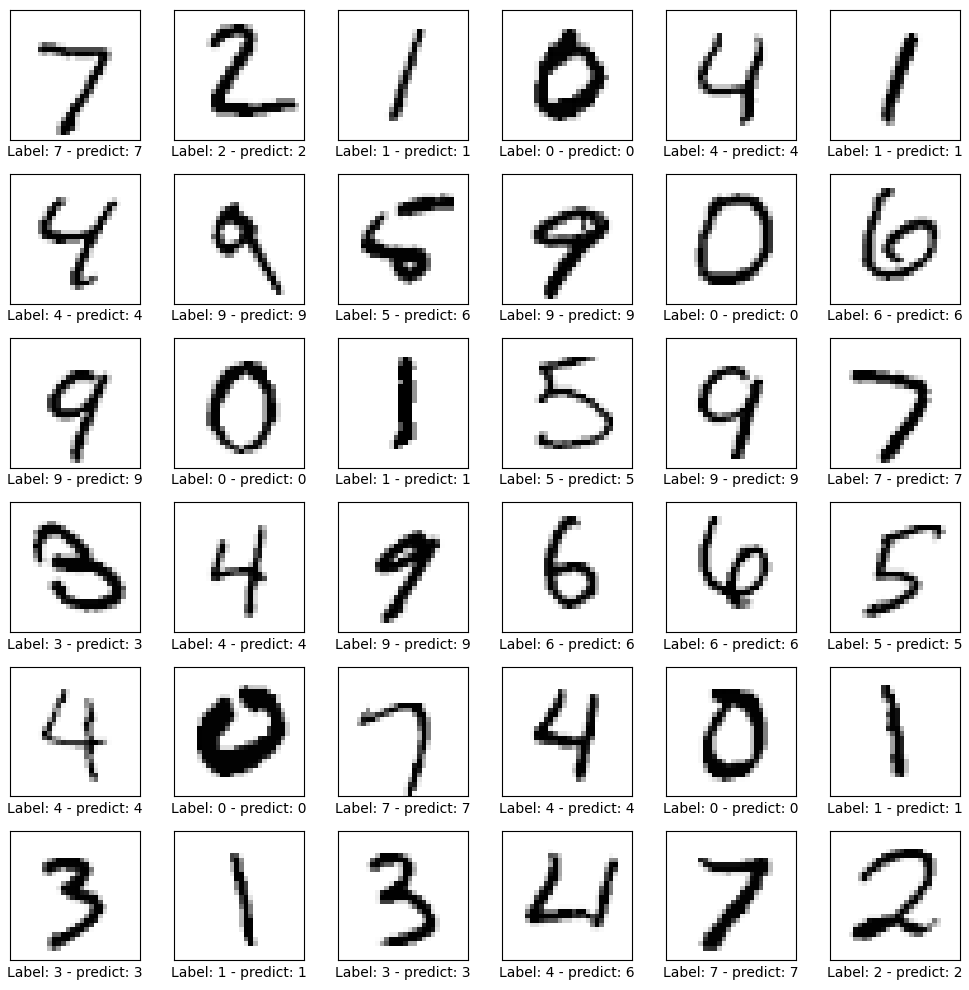

In [ ]:
# as primeiras amostras de imagens do banco de dados de teste com suas predições
show_predict(X_test, y_test, y_predict)

# Predições com novos dígitos

Podemos fazer o teste na nossa rede, para ver se vai predizer corretamente os dígitos que nós escrevermos. Para isso, utilize Paint e escreva números de 0 a 9. Salve no drive (0.png, 1.png, ..., 9.png) e rode novamente a predição para verificar se a rede treinada consegue predizer corretamente os novos dígitos.

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

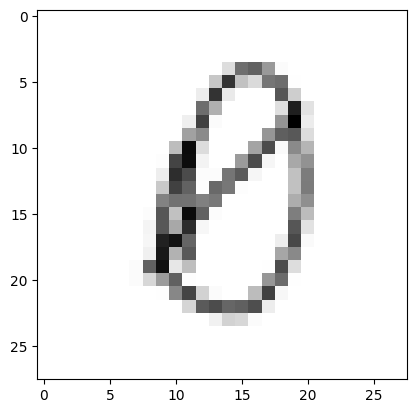

In [ ]:
# visualizando uma imagem feita no paint
from numpy import asarray
from PIL import Image
path='/content/drive/MyDrive/Colab Notebooks/images/'
img_num=str(0)+'.png'
img1=Image.open(path + img_num)
img1.thumbnail((28,28))
img2=img1.convert(mode='L')
img3=asarray(img2)
# desinvertendo o vetor
img3 = 255 - img3
plt.imshow(img3, cmap='Greys')
plt.show()

In [ ]:
# Local  das imagens de 10 dígitos feitos no paint (0.png, 1.png...., 9.png)
path='/content/drive/MyDrive/Colab Notebooks/images/'
# Crio uma cópia nova do banco de dados de teste, sem que aponte para o mesmo objecto:
X_test_new = np.copy(X_test)
X_test_flat_new = np.copy(X_test_flat)
X_train_sc_new = np.copy(X_train_sc)
y_test_new = np.copy(y_test)
# Carregando as imagens (0.png, 1.png...., 9.png)
for i in range(3):
  img_num=str(i)+'.png'
  img1=Image.open(path + img_num)
  img1.thumbnail((28,28))
  img2=img1.convert(mode='L')
  img3=asarray(img2)
  img3 = 255 - img3
  # salvo as 10 imagens novas nas primeiras posições de X_test_new
  X_test_new[i] = img3
  X_test_flat_new[i] = X_test_new[i].reshape(-1, 28*28)
  X_train_sc_new[i] = X_test_flat_new[i] / 255
  y_test_new[i] = i

A figura mostra a predição dos dígitos criados e inseridos no banco de dados de teste.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


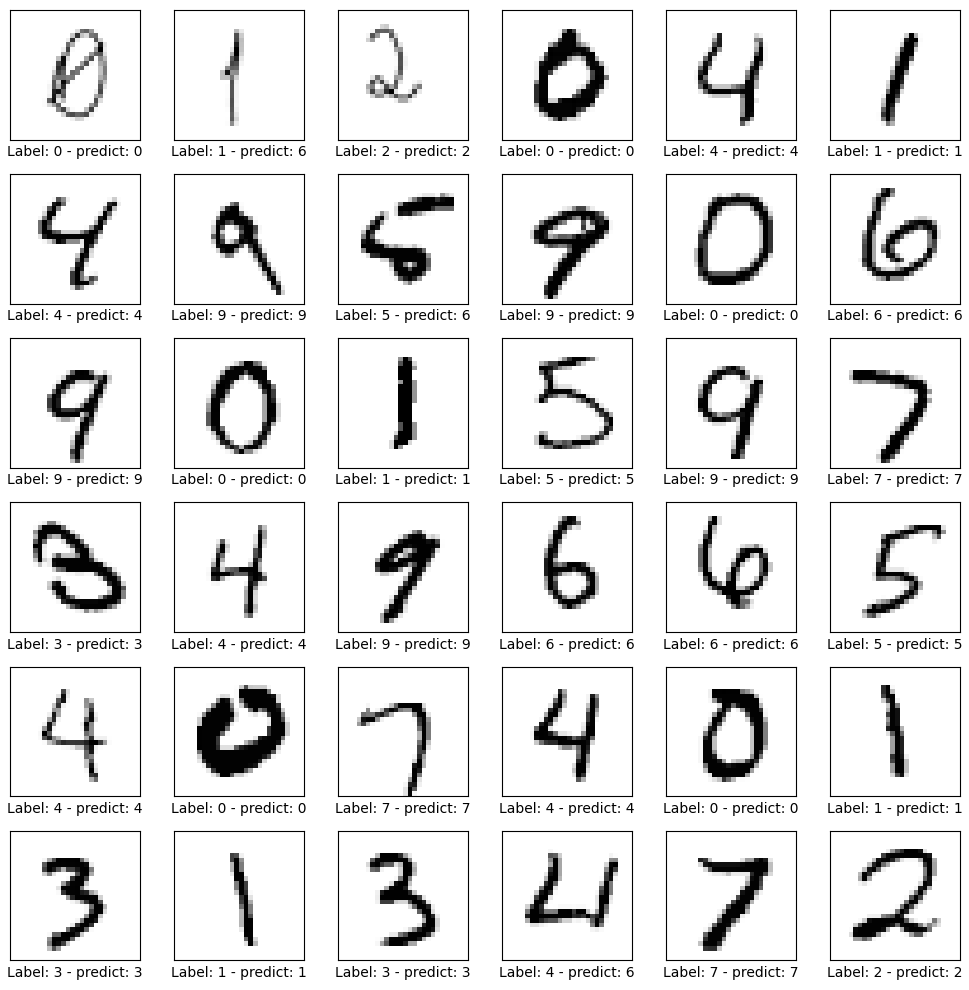

In [ ]:
# predição dos 10 dígitos feitos no paint
prediction_new = model.predict(X_test_flat_new)
y_predict_new = np.argmax(prediction_new,axis=1)
show_predict(X_test_new, y_test_new, y_predict_new)

In [ ]:
# verificando a probabilidade de acerto/erro da previsão
amostra = 0;
print('y_predict_new[amostra] =', prediction_new[amostra])
print('Soma dos valores de predição da amostra:', prediction_new[amostra].sum())
print('Posição do maior valor numérico:', prediction_new[amostra].argmax())
print('Probalidade de acerto: %.3f%%' %(prediction_new[amostra].max()*100))
print('Label y_test_new[amostra] =', y_test_new[amostra])

y_predict_new[amostra] = [0.99999994 0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
Soma dos valores de predição da amostra: 0.99999994
Posição do maior valor numérico: 0
Probalidade de acerto: 100.000%
Label y_test_new[amostra] = 0


##Exercícios

1) Compare o desempenho desta rede com o apresentado originalmente na part #1 (notebook anterior).

2) Pode-se realizar mudanças nos hiperparâmetros com o intuito de melhorar os resultados obtidos. Ao observar os gráficos gerados ao final do treinamento, pode-se observar que durante as 20 épocas, o modelo não alcançou a convergência, que seria representada por uma linha quase horizontal no final do gráfico. Pode-se aumentrar o número de épocas para 30, 50, 100 ou maior para se tentar melhor acurária. Deve-se tomar cuidado com o overfitting, característico de um treinamento excessivo.

4) Utilizando os conhecimentos e as experiências adiquiridos nos exercícios com redes neurais anteriores, proceda a sintonia da rede, objetivando uma melhor eficiência. Mantendo a arquitetura da rede, processa a sintonia dos hiperparâmetros: `learning_rate` e `batch_size `tentando uma melhor desempenho da rede. Tome cuidado com o *overfitting*! Elabore gráficos e/ou tabelas comparativas.

5) Crie 30 figuras de dígitos (0 à 9) feitas por 3 pessoas distintas e carrege no banco de dados de testes. Faça as predições e veirifique se a rede consegue predizer positivamente seus dígitos. Qual a acurácia na predição das 30 amostras?

6) Implemente uma função para mostrar um único dígito do banco de dados de teste e suas previsões. Por exemplo: mostrar 36 amostras do dígito '9' com suas previsões.

# Referências

[1] https://www.deeplearningbook.com.br/algoritmo-backpropagation-parte-2-treinamento-de-redes-neurais/

[2] GÉRON, A. *Hands-On Machine Learning with Scikit-Learn and TensorFlow*. California, EUA: O’Reilly Media, 2017.

[3] NIELSEN, M. *Neural Networks and Deep Learning*. Determination Press, 2015.

[4] PETERS, Tim. *The zen of python*. In: Pro Python. Apress, 2010. p. 301-302.

[5] Mosconi, Francesco. *Zero to Deep Learning*. Catalit LLC, 2019.

[6] https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-from-scratch-for-mnist-handwritten-digit-classification/

[7] https://www.kaggle.com/code/prashant111/mnist-deep-neural-network-with-keras

[8] https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3

[9] https://www.kaggle.com/code/heeraldedhia/mnist-classifier-first-deep-learning-project

[10] https://towardsdatascience.com/image-classification-in-10-minutes-with-mnist-dataset-54c35b77a38d

[11] https://www.tensorflow.org/api_docs/python/tf/keras/Sequential

# Respostas

In [ ]:
print('''

1) Neste Notebook, a rede possui 4 camadas e 570.602 parâmetros, contra 2 camadas do notebook anterior e 235.146

143% maior. Mesmo com este acréscimo de complexidade, o tempo necessário para o treinamento em GPU só aumentou de 36.67 segundos para 40.58 segundos. Apenas 11% de aumento.

A performance nos dados de treinamento praticamente foi a mesma, mas nos dados de teste aumentou significativamente,

provando que esta arquitetura é mais adequada para GENERALIZAR o problema apresentado

''')




1) Neste Notebook, a rede possui 4 camadas e 570.602 parâmetros, contra 2 camadas do notebook anterior e 235.146

143% maior. Mesmo com este acréscimo de complexidade, o tempo necessário para o treinamento em GPU só aumentou de 36.67 segundos para 40.58 segundos. Apenas 11% de aumento.

A performance nos dados de treinamento praticamente foi a mesma, mas nos dados de teste aumentou significativamente,

provando que esta arquitetura é mais adequada para GENERALIZAR o problema apresentado




In [ ]:
def train_ex2(ep):
  # início do treinamento da rede
  start_time = time.process_time()
  # carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
  model.load_weights('model.weights.h5')
  # treinamento da rede
  h = model.fit(X_train_sc, y_train_cat, batch_size=128, epochs=ep, verbose=1, validation_split=0.1)
  # tempo total de treinamento da rede
  training_time_s = time.process_time() - start_time
  training_time_m = training_time_s / 60
  print("\nTempo de treinamento da rede: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))
  return h

def plot_graph2(h):
  plt.figure(figsize = (8,3))
  plt.subplot(1,2,1)
  plt.plot(h.history['loss'], label = 'Treino')
  plt.plot(h.history['val_loss'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Função Custo')
  plt.title('loss')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.grid()
  plt.subplot(1,2,2)
  plt.plot(h.history['accuracy'], label = 'Treino')
  plt.plot(h.history['val_accuracy'], label = 'Validação')
  plt.xlabel('Épocas')
  plt.ylabel('Acurácia')
  plt.title('accuracy')
  plt.xticks()
  plt.yticks()
  plt.legend()
  plt.tight_layout()
  plt.grid()
  plt.show()




2) Pode-se realizar mudanças nos hiperparâmetros com o intuito de melhorar os resultados obtidos. Ao observar os gráficos gerados ao final do treinamento,
 pode-se observar que durante as 20 épocas, o modelo não alcançou a convergência, que seria representada por uma linha quase horizontal no final do gráfico.
 Pode-se aumentrar o número de épocas para 30, 50, 100 ou maior para se tentar melhor acurária. Deve-se tomar cuidado com o overfitting, característico de um treinamento excessivo.

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4024 - loss: 1.9033 - val_accuracy: 0.8832 - val_loss: 0.5036
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8689 - loss: 0.4909 - val_accuracy: 0.9170 - val_loss: 0.2969
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9028 - loss: 0.3378 - val_accuracy: 0.9312 - val_loss: 0.2468
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9158 - loss: 0.2882 - val_accuracy: 0.9360 - val_l

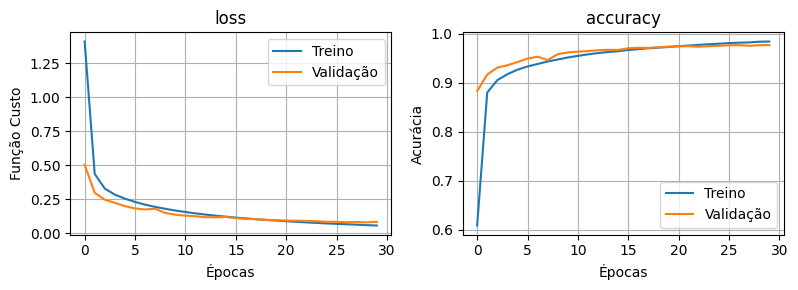

Com  50  épocas


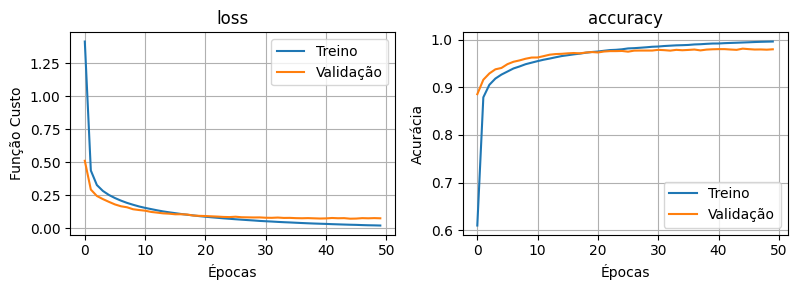

Com  70  épocas


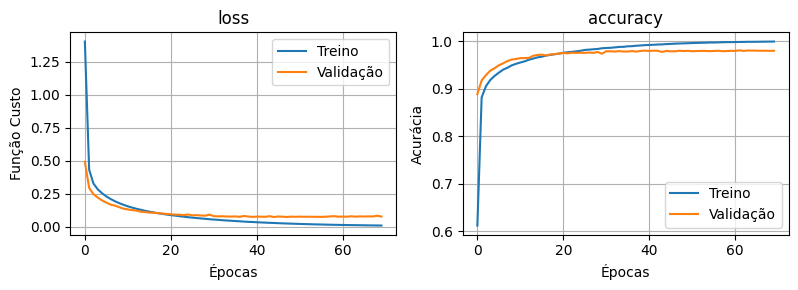

Com  100  épocas


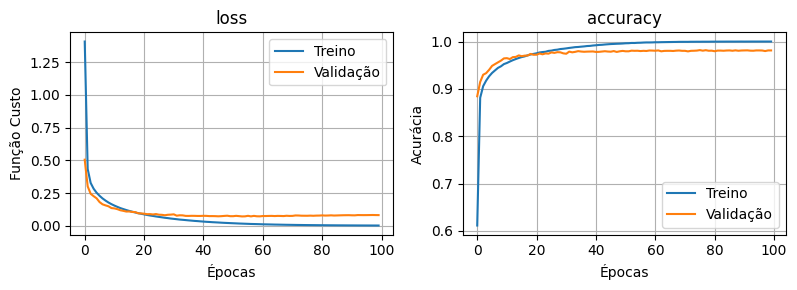

Com  115  épocas


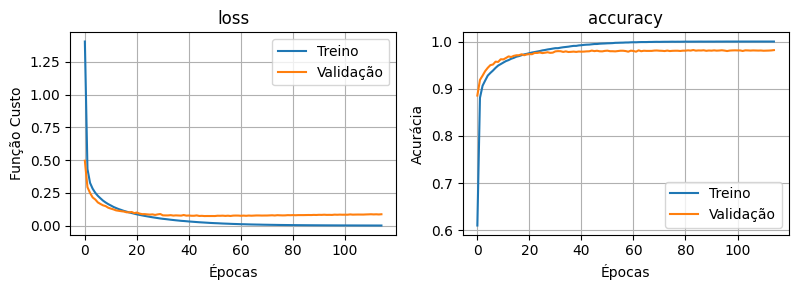

In [ ]:
print('''
2) Pode-se realizar mudanças nos hiperparâmetros com o intuito de melhorar os resultados obtidos. Ao observar os gráficos gerados ao final do treinamento,
 pode-se observar que durante as 20 épocas, o modelo não alcançou a convergência, que seria representada por uma linha quase horizontal no final do gráfico.
 Pode-se aumentrar o número de épocas para 30, 50, 100 ou maior para se tentar melhor acurária. Deve-se tomar cuidado com o overfitting, característico de um treinamento excessivo.
''')

eps = [30,50,70,100,115]

h_ex2 = {}
for ep in eps:
  h_ex2[ep] = train_ex2(ep)


for ep in eps:
  print("Com ", ep, " épocas")
  plot_graph2(h_ex2[ep])



In [ ]:
def train_ex4(bs, eta):

  # inicializa a sessão
  K.clear_session()
  # inicialização do modelo
  m = Sequential()
  # camada de entrada Input = 28*28 =  784
  m.add(Input((28*28,)))
  # primeira hidden layer
  m.add(Dense(512, activation='relu'))
  # segunda hidden layer
  m.add(Dense(256, activation='relu'))
  # terceira hidden layer
  m.add(Dense(128, activation='relu'))
  # quarta hidden layer
  m.add(Dense(32, activation='relu'))
  # camada de saída
  m.add(Dense(10, activation='softmax'))
  # início do treinamento da rede
  start_time = time.process_time()
  # carrega os pesos e bias com os valores inicias, para um novo treinamento da rede
  m.load_weights('model.weights.h5')

  # optimizer = Stocatisc Gradient Decent
  optimizer_=SGD(learning_rate=eta)
  # compilando o modelo da rede
  m.compile(loss='categorical_crossentropy', optimizer=optimizer_, metrics=['accuracy'])
  # salva os pesos e bias com os valores inicias
  m.save_weights('model.weights.h5')
  # plota o sumário do modelo da rede
  m.summary()

    # treinamento da rede
  h = m.fit(X_train_sc, y_train_cat, batch_size=bs, epochs=30, verbose=1, validation_split=0.1) #
  # tempo total de treinamento da rede
  training_time_s = time.process_time() - start_time
  training_time_m = training_time_s / 60
  print("\nTempo de treinamento da rede: %.2f segundos (%.2f minutos)" % (training_time_s, training_time_m))


  return m, h


4) Utilizando os conhecimentos e as experiências adiquiridos nos exercícios com redes neurais anteriores, proceda a sintonia da rede, objetivando uma melhor eficiência.
Mantendo a arquitetura da rede, processa a sintonia dos hiperparâmetros: learning_rate e batch_sizetentando uma melhor desempenho da rede. Tome cuidado com o overfitting!
Elabore gráficos e/ou tabelas comparativas.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.6638 - loss: 1.0270 - val_accuracy: 0.9533 - val_loss: 0.1538
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9478 - loss: 0.1755 - val_accuracy: 0.9707 - val_loss: 0.1008
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9628 - loss: 0.1246 - val_accuracy: 0.9548 - val_loss: 0.1473
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9751 - loss: 0.0813 - val_accuracy: 0.9755 - val_loss: 0.0798
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9821 - loss: 0.0585 - val_accuracy: 0.9773 - val_loss: 0.0739
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.9814 - loss: 0.0728 - val_accuracy: 0.9633 - val_loss: 0.1399
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - accuracy: 0.9624 - loss: 0.1298 - val_accuracy: 0.9757 - val_loss: 0.0755
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9860 - loss: 0.0473 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6397 - loss: 1.1615 - val_accuracy: 0.9298 - val_loss: 0.2285
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9273 - loss: 0.2425 - val_accuracy: 0.9628 - val_loss: 0.1395
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9510 - loss: 0.1654 - val_accuracy: 0.9655 - val_loss: 0.1217
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.9624 - loss: 0.1266 - val_accuracy: 0.9698 - val_loss: 0.1007
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9690 - loss: 0.1045 - val_accuracy: 0.9737 - val_loss: 0.0966
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9749 - loss: 0.0836 - val_accuracy: 0.9763 - val_loss: 0.0818
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.9803 - loss: 0.0680 - val_accuracy: 0.9757 - val_loss: 0.0779
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9836 - loss: 0.0560 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.5692 - loss: 1.4203 - val_accuracy: 0.9168 - val_loss: 0.2867
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9046 - loss: 0.3211 - val_accuracy: 0.9377 - val_loss: 0.2168
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9290 - loss: 0.2419 - val_accuracy: 0.9542 - val_loss: 0.1676
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9432 - loss: 0.1910 - val_accuracy: 0.9605 - val_loss: 0.1417
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9512 - loss: 0.1613 - val_accuracy: 0.9602 - val_loss: 0.1405
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.9597 - loss: 0.1385 - val_accuracy: 0.9687 - val_loss: 0.1136
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.9658 - loss: 0.1164 - val_accuracy: 0.9708 - val_loss: 0.1039
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.9695 - loss: 0.1080 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.2759 - loss: 2.1464 - val_accuracy: 0.6847 - val_loss: 1.3743
Epoch 2/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.7486 - loss: 1.1021 - val_accuracy: 0.8902 - val_loss: 0.5007
Epoch 3/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.8659 - loss: 0.5150 - val_accuracy: 0.9097 - val_loss: 0.3456
Epoch 4/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.8908 - loss: 0.3948 - val_accuracy: 0.9188 - val_loss: 0.2932
Epoch 5/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - accuracy: 0.9039 - loss: 0.3448 - val_accuracy: 0.9252 - val_loss: 0.2644
Epoch 6/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9103 - loss: 0.3125 - val_accuracy: 0.9317 - val_loss: 0.2449
Epoch 7/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9156 - loss: 0.2970 - val_accuracy: 0.9335 - val_loss: 0.2282
Epoch 8/30
211/211 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.9195 - loss: 0.2739 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.7387 - loss: 0.8213 - val_accuracy: 0.9668 - val_loss: 0.1105
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9594 - loss: 0.1305 - val_accuracy: 0.9740 - val_loss: 0.0838
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9759 - loss: 0.0788 - val_accuracy: 0.9758 - val_loss: 0.0813
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9836 - loss: 0.0536 - val_accuracy: 0.9788 - val_loss: 0.0720
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9886 - loss: 0.0392 - val_accuracy: 0.9773 - val_loss: 0.0785
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9755 - val_loss: 0.0870
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9939 - loss: 0.0200 - val_accuracy: 0.9815 - val_loss: 0.0682
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9964 - loss: 0.0128 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7292 - loss: 0.8694 - val_accuracy: 0.9465 - val_loss: 0.1784
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9481 - loss: 0.1729 - val_accuracy: 0.9702 - val_loss: 0.1032
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9672 - loss: 0.1081 - val_accuracy: 0.9732 - val_loss: 0.0922
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9775 - loss: 0.0770 - val_accuracy: 0.9785 - val_loss: 0.0777
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9822 - loss: 0.0572 - val_accuracy: 0.9768 - val_loss: 0.0851
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9859 - loss: 0.0473 - val_accuracy: 0.9783 - val_loss: 0.0720
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9798 - val_loss: 0.0688
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9933 - loss: 0.0242 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.6774 - loss: 1.0721 - val_accuracy: 0.9375 - val_loss: 0.2160
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9261 - loss: 0.2437 - val_accuracy: 0.9598 - val_loss: 0.1454
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9498 - loss: 0.1695 - val_accuracy: 0.9673 - val_loss: 0.1169
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9630 - loss: 0.1277 - val_accuracy: 0.9697 - val_loss: 0.1051
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9704 - loss: 0.0991 - val_accuracy: 0.9735 - val_loss: 0.0912
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9767 - loss: 0.0808 - val_accuracy: 0.9725 - val_loss: 0.0937
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9807 - loss: 0.0668 - val_accuracy: 0.9757 - val_loss: 0.0822
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9844 - loss: 0.0535 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3982 - loss: 1.9012 - val_accuracy: 0.8858 - val_loss: 0.4910
Epoch 2/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.8698 - loss: 0.4873 - val_accuracy: 0.9180 - val_loss: 0.2922
Epoch 3/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9010 - loss: 0.3415 - val_accuracy: 0.9308 - val_loss: 0.2442
Epoch 4/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9171 - loss: 0.2886 - val_accuracy: 0.9365 - val_loss: 0.2261
Epoch 5/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9270 - loss: 0.2534 - val_accuracy: 0.9410 - val_loss: 0.1972
Epoch 6/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9339 - loss: 0.2247 - val_accuracy: 0.9500 - val_loss: 0.1796
Epoch 7/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9390 - loss: 0.2083 - val_accuracy: 0.9503 - val_loss: 0.1719
Epoch 8/30
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9445 - loss: 0.1926 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7993 - loss: 0.6222 - val_accuracy: 0.9672 - val_loss: 0.1083
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9674 - loss: 0.1052 - val_accuracy: 0.9735 - val_loss: 0.0892
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9781 - loss: 0.0663 - val_accuracy: 0.9758 - val_loss: 0.0844
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9863 - loss: 0.0440 - val_accuracy: 0.9803 - val_loss: 0.0734
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9900 - loss: 0.0310 - val_accuracy: 0.9797 - val_loss: 0.0708
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9933 - loss: 0.0211 - val_accuracy: 0.9802 - val_loss: 0.0778
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.9931 - loss: 0.0210 - val_accuracy: 0.9783 - val_loss: 0.0908
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9949 - loss: 0.0167 - val_accur

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7956 - loss: 0.6621 - val_accuracy: 0.9615 - val_loss: 0.1324
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9620 - loss: 0.1228 - val_accuracy: 0.9720 - val_loss: 0.0907
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9773 - loss: 0.0752 - val_accuracy: 0.9758 - val_loss: 0.0834
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9845 - loss: 0.0500 - val_accuracy: 0.9763 - val_loss: 0.0733
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.9889 - loss: 0.0364 - val_accuracy: 0.9797 - val_loss: 0.0674
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9921 - loss: 0.0256 - val_accuracy: 0.9803 - val_loss: 0.0734
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9942 - loss: 0.0191 - val_accuracy: 0.9790 - val_loss: 0.0752
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accurac

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.7594 - loss: 0.8030 - val_accuracy: 0.9535 - val_loss: 0.1591
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9509 - loss: 0.1671 - val_accuracy: 0.9668 - val_loss: 0.1080
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9700 - loss: 0.1064 - val_accuracy: 0.9728 - val_loss: 0.1013
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9770 - loss: 0.0780 - val_accuracy: 0.9757 - val_loss: 0.0843
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.9821 - loss: 0.0598 - val_accuracy: 0.9758 - val_loss: 0.0809
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9871 - loss: 0.0445 - val_accuracy: 0.9807 - val_loss: 0.0708
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9903 - loss: 0.0341 - val_accuracy: 0.9800 - val_loss: 0.0723
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 570,602 (2.18 MB)

 Trainable params: 570,602 (2.18 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.5454 - loss: 1.5163 - val_accuracy: 0.9170 - val_loss: 0.3021
Epoch 2/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9012 - loss: 0.3390 - val_accuracy: 0.9338 - val_loss: 0.2280
Epoch 3/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9238 - loss: 0.2612 - val_accuracy: 0.9478 - val_loss: 0.1856
Epoch 4/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9373 - loss: 0.2126 - val_accuracy: 0.9543 - val_loss: 0.1627
Epoch 5/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9469 - loss: 0.1848 - val_accuracy: 0.9608 - val_loss: 0.1388
Epoch 6/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9542 - loss: 0.1581 - val_accuracy: 0.9643 - val_loss: 0.1255
Epoch 7/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9600 - loss: 0.1380 - val_accuracy: 0.9677 - val_loss: 0.1143
Epoch 8/30
844/844 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.9639 - loss: 0.1242 - val_accuracy:

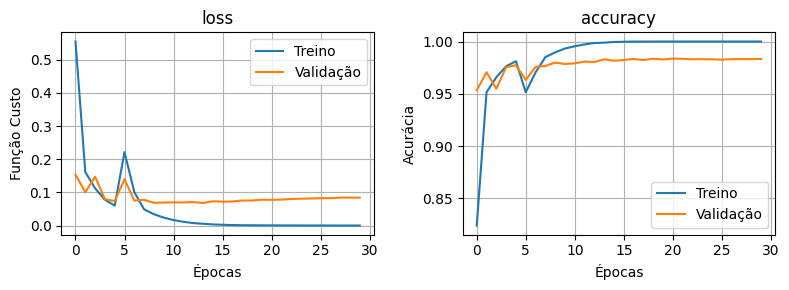

******************************************
256-0.1


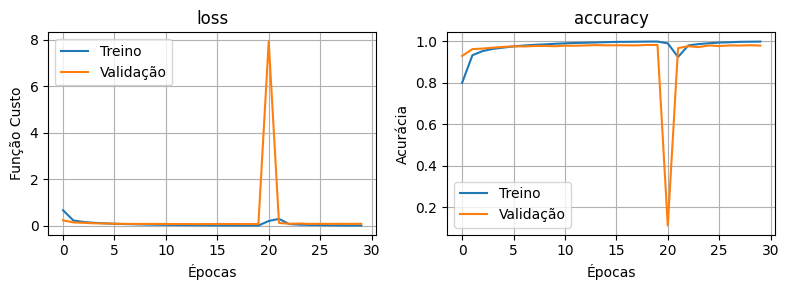

******************************************
256-0.05


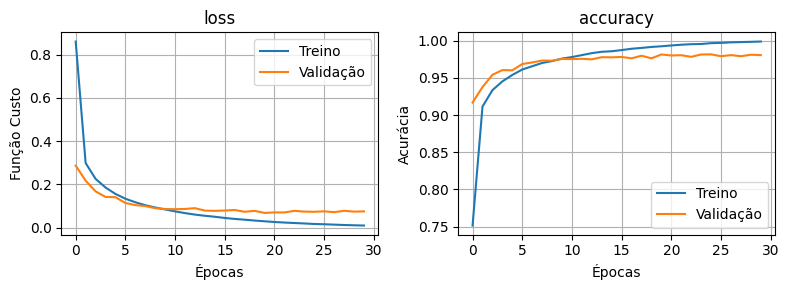

******************************************
256-0.01


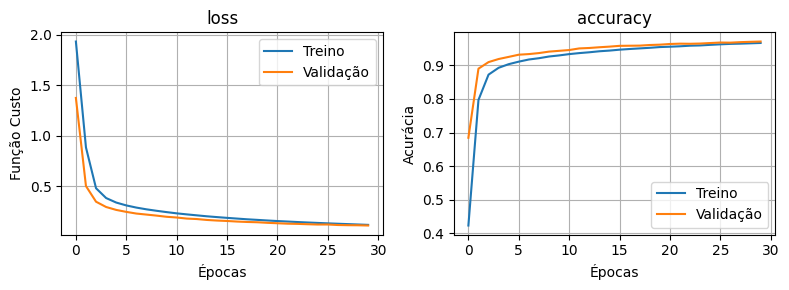

******************************************
128-0.2


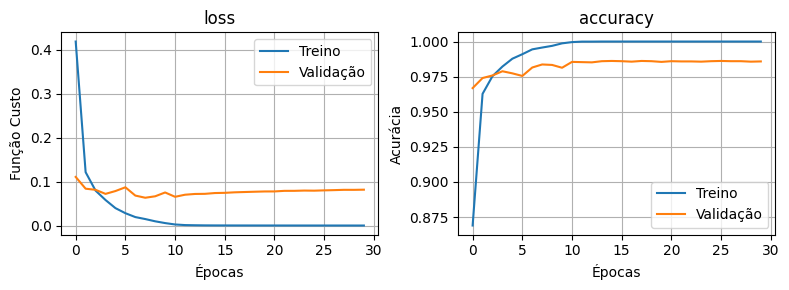

******************************************
128-0.1


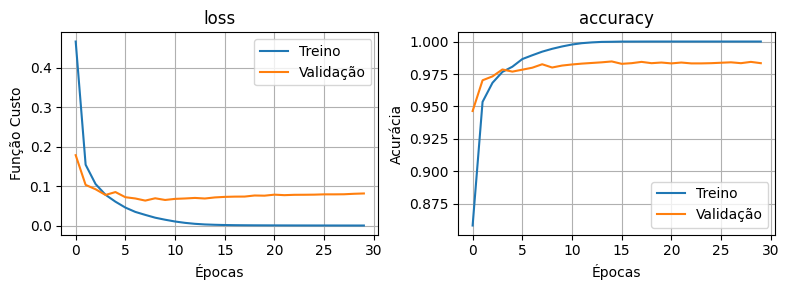

******************************************
128-0.05


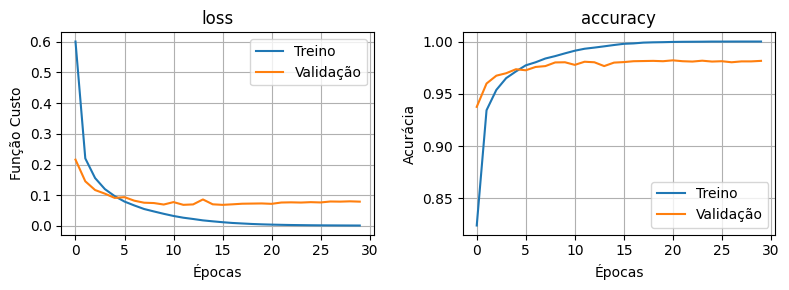

******************************************
128-0.01


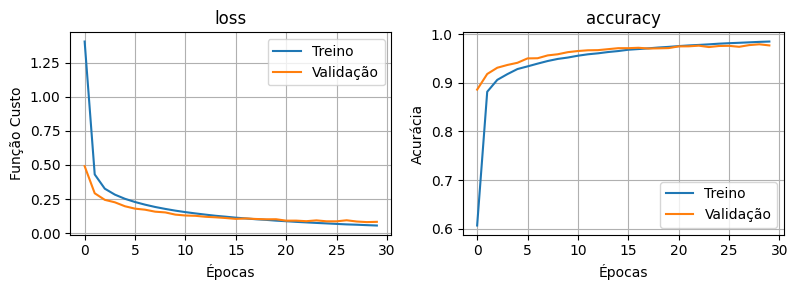

******************************************
64-0.2


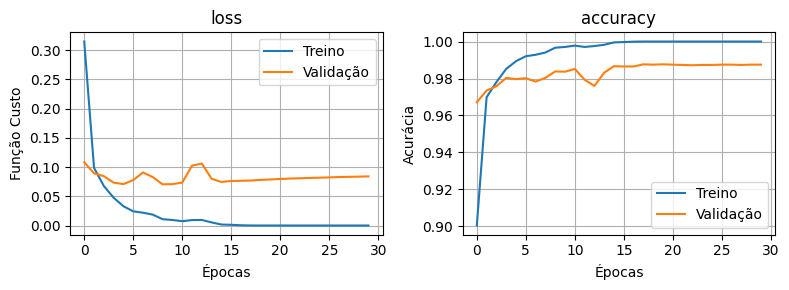

******************************************
64-0.1


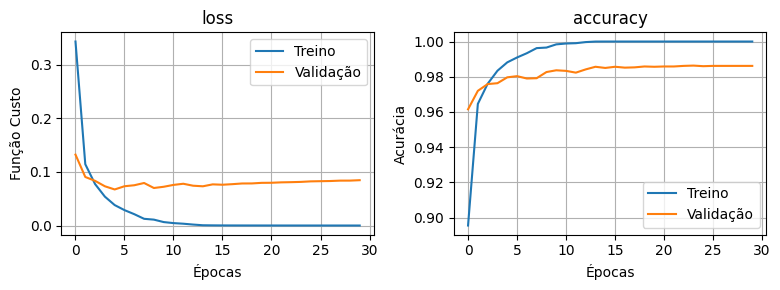

******************************************
64-0.05


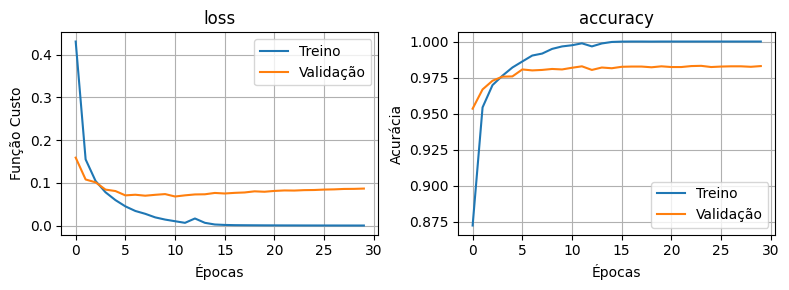

******************************************
64-0.01


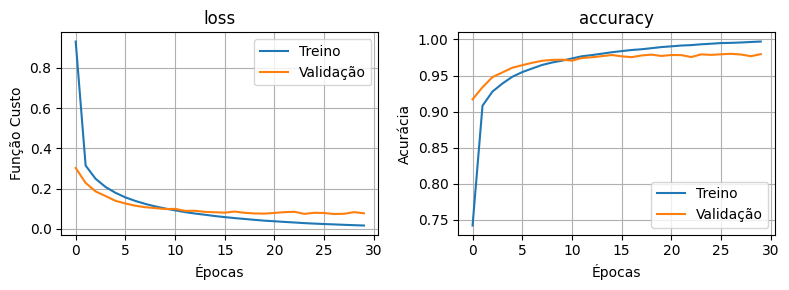

******************************************


In [ ]:
print('''
4) Utilizando os conhecimentos e as experiências adiquiridos nos exercícios com redes neurais anteriores, proceda a sintonia da rede, objetivando uma melhor eficiência.
Mantendo a arquitetura da rede, processa a sintonia dos hiperparâmetros: learning_rate e batch_sizetentando uma melhor desempenho da rede. Tome cuidado com o overfitting!
Elabore gráficos e/ou tabelas comparativas.
''')

etas = [0.2,0.1,0.05,0.01]
bss = [256,128,64]
h_ex4 = {}
m_ex4 = {}
ks = []
for bs in bss:
  for eta in etas:
    k = str(bs)+'-'+str(eta)
    ks.append(k)
    m_ex4[k], h_ex4[k] = train_ex4(bs, eta)

for k in ks:
  print(k)
  plot_graph2(h_ex4[k])
  print("******************************************")



In [ ]:
def add_my_images():

    # Local  das imagens de 10 dígitos feitos no paint (0.png, 1.png...., 9.png)
  path='/content/drive/MyDrive/Colab Notebooks/images/v'

  # Crio uma cópia nova do banco de dados de teste, sem que aponte para o mesmo objecto:
  X_test_new = np.copy(X_test)
  X_test_flat_new = np.copy(X_test_flat)
  X_train_sc_new = np.copy(X_train_sc)
  y_test_new = np.copy(y_test)
  # Carregando as imagens (0.png, 1.png...., 9.png)
  for j in range(2):
    for i in range(10):
      img_num=str(i)+'.png'
      img1=Image.open(path + str(j) + '/' + img_num)
      img1.thumbnail((28,28))
      img2=img1.convert(mode='L')
      img3=asarray(img2)
      img3 = 255 - img3
      # salvo as 10 imagens novas nas primeiras posições de X_test_new
      X_test_new[i] = img3
      X_test_flat_new[i] = X_test_new[i].reshape(-1, 28*28)
      X_train_sc_new[i] = X_test_flat_new[i] / 255
      y_test_new[i] = i

    return X_test_flat_new,X_test_new, y_test_new


5) Crie 30 figuras de dígitos (0 à 9) feitas por 3 pessoas distintas e carrege no banco de dados de testes.
Faça as predições e veirifique se a rede consegue predizer positivamente seus dígitos. Qual a acurácia na predição das 30 amostras?

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


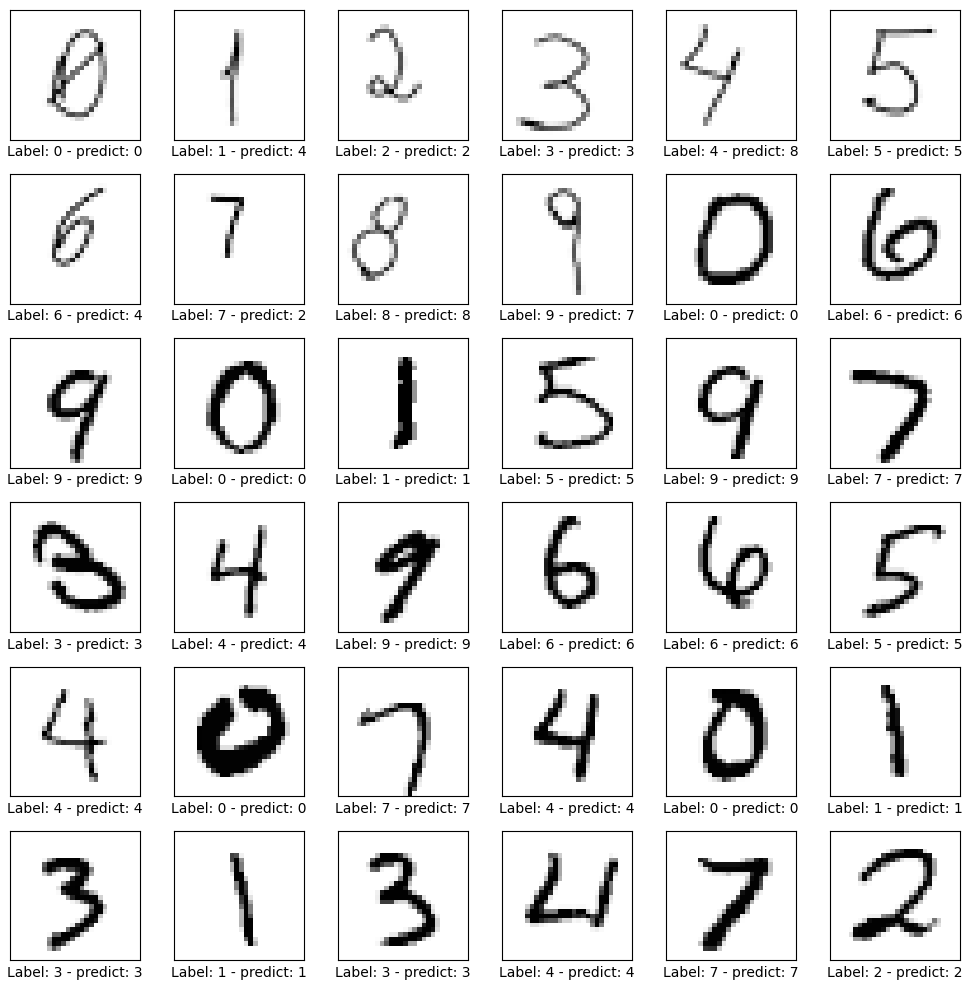

In [ ]:
print('''
5) Crie 30 figuras de dígitos (0 à 9) feitas por 3 pessoas distintas e carrege no banco de dados de testes.
Faça as predições e veirifique se a rede consegue predizer positivamente seus dígitos. Qual a acurácia na predição das 30 amostras?
''')

X_test_flat_new, X_test_new, y_test_new = add_my_images()
# predição dos 30 dígitos feitos no paint
prediction_new = model.predict(X_test_flat_new)
y_predict_new = np.argmax(prediction_new,axis=1)
show_predict(X_test_new, y_test_new, y_predict_new)

In [ ]:
def get_digit_index(dg, qt, y_cat):

  idx = []

  for i in range(len(y_cat)):
    if np.argmax(y_cat[i]) == dg and len(idx)< qt:
      idx.append(i)

  return idx

def get_digit_list(idx, X, y):

  X_ = np.full((len(idx), 784), np.inf)
  y_ = np.full((len(idx)), np.inf)
  j = 0
  for i in idx:

    X_[j] = X[i]
    y_[j] = np.argmax(y[i])
    j += 1

  return X_, y_



In [ ]:
def show_predict2(examples, targets, predict_, qt):
    init = 0
    plt.figure(figsize=(20, 20))

    for i in range(qt):
        plt.subplot(int(qt/2), int(qt/2), i+1)
        plt.imshow(examples[init + i], cmap='Greys')
        plt.xlabel('', size = 10)
        plt.xticks([])
        plt.yticks([])

    plt.tight_layout()
    plt.show()


6) Implemente uma função para mostrar um único dígito do banco de dados de teste e suas previsões.
Por exemplo: mostrar 36 amostras do dígito '9' com suas previsões.



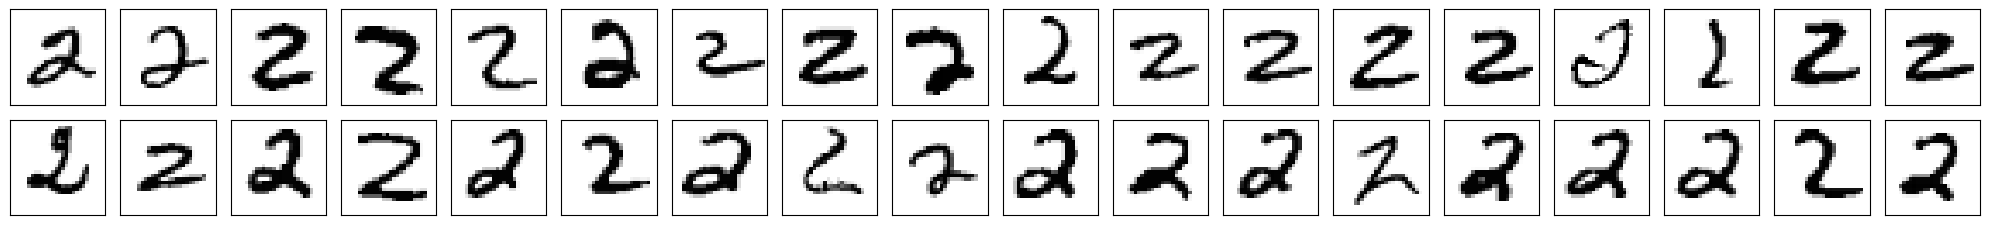

In [ ]:
print('''
6) Implemente uma função para mostrar um único dígito do banco de dados de teste e suas previsões.
Por exemplo: mostrar 36 amostras do dígito '9' com suas previsões.
''')
dg = 2
qt = 36
idx = get_digit_index(dg, qt, y_train_cat )

X_ex6, y_ex6 = get_digit_list(idx, X_train_sc, y_train_cat )
X_ex61 = X_ex6.reshape(qt,28,28)
show_predict2(X_ex61, y_ex6, y_ex6, qt)


In [ ]:
i =4

z = np.full((i, 10), np.inf)

z[0] = [1,1,1,1,1,1,1,1,1,1]

print(X_ex6)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.   

In [ ]:

print(X_test_new.shape, y_test_new.shape, y_predict_new.shape)

(10000, 28, 28) (10000,) (10000,)


IndexError: list index out of range

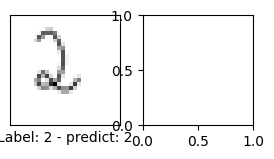

In [ ]:
show_predict([X_test_new[2]], [y_test_cat[2]], [y_predict_new[2]])